In [7]:
pip install compel transformers ftfy regex scipy safetensors 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')

2025-12-14 08:59:51.677099: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-14 08:59:51.689820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-14 08:59:51.708098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-14 08:59:51.713693: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-14 08:59:51.727102: I tensorflow/core/platform/cpu_feature_guar

In [2]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

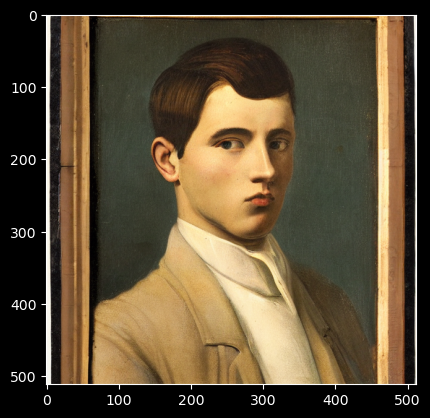

In [3]:
prompt = "portrait of a young man with short hair"
image = pipe(prompt).images[0]
image.save("generated_face.png")
plt.imshow(image)

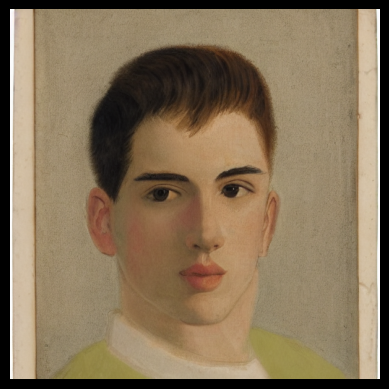

In [14]:
plt.imshow(image)
plt.axis('off')
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

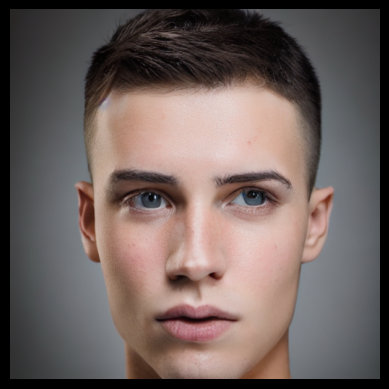

In [8]:
from compel import Compel

compel = Compel(tokenizer=pipe.tokenizer, text_encoder=pipe.text_encoder)

# Now you can use longer prompts
long_prompt = """portrait of a young man with short hair, detailed facial features, 
realistic skin texture, natural lighting, high quality, photorealistic, 
professional photography, sharp focus, depth of field, studio lighting, 
warm tones, subtle shadows, clean background"""

conditioning = compel.build_conditioning_tensor(long_prompt)
image = pipe(prompt_embeds=conditioning).images[0]
plt.imshow(image)
plt.axis('off')
plt.show()


[notice] A new release of pip is available: 24.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Token indices sequence length is longer than the specified maximum sequence length for this model (80 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['no scars .']


  0%|          | 0/50 [00:00<?, ?it/s]

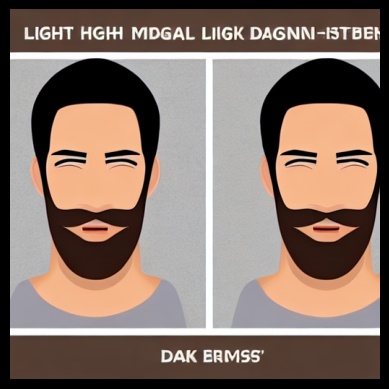

In [4]:
prompt = """" Light-medium skintone male, oval face, neutral expression. Short dark brown thick hair, straight hairline, smooth forehead. 
Short well-groomed beard. Medium round dark brown eyes, average lashes. 
Medium-thick slightly arched dark brown brows. Straight medium nose, average lips with thinner upper lip. 
Strong jawline, defined chin, average ears, no scars.

"""

image = pipe(prompt).images[0]
image.save("geneGeated_face_inmate_prompt.png")
plt.axis('off')
plt.imshow(image)

  0%|          | 0/50 [00:00<?, ?it/s]

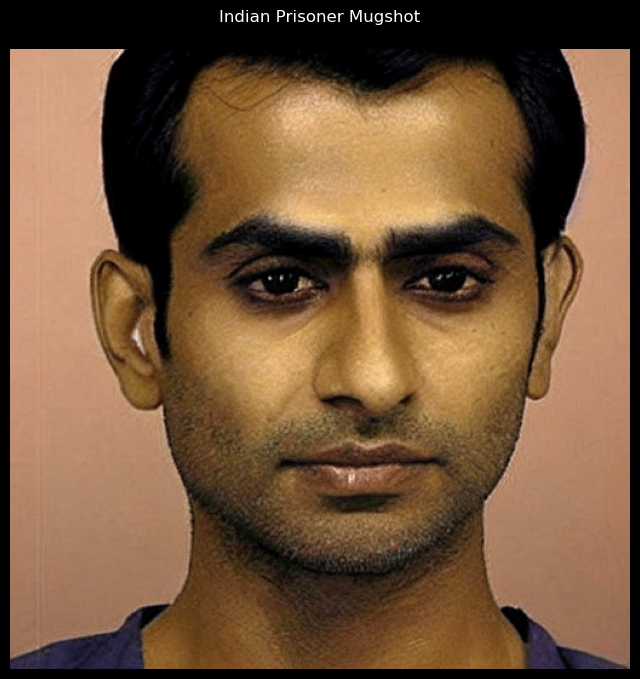

In [10]:
# Detailed mugshot prompt for Indian prisoner (150+ tokens)
prompt = """Professional police mugshot photograph of an Indian male prisoner, front-facing neutral expression, 
medium brown skin tone, age 28-35 years old, oval face shape with defined cheekbones and strong jawline. 
Short cropped black hair, slightly messy, receding hairline at temples. Thick dark eyebrows, slightly arched. 
Deep-set dark brown eyes with tired expression, slight dark circles underneath, medium-length eyelashes. 
Straight nose with slightly wide nostrils, average bridge height. Full lips with defined cupid's bow, 
slight stubble beard growth around chin and jawline. Slight mustache visible above upper lip. Small scar 
on left cheek near ear. Visible tattoo on neck showing traditional Indian script. Wearing orange prison 
jumpsuit with visible collar, prisoner identification number visible on chest. Plain grey concrete wall background, 
harsh fluorescent lighting from above creating slight shadows under nose and chin. Standard police mugshot composition, 
centered framing, eye-level camera angle, official documentation style, high detail, sharp focus on facial features, 
realistic skin texture with visible pores, professional law enforcement photography, neutral color grading, 
ID board visible at bottom with prisoner number and date, serious demeanor, direct eye contact with camera, 
photorealistic, documentary photography style, 8k resolution, ultra detailed."""

# Generate the image

conditioning = compel.build_conditioning_tensor(prompt)
image = pipe(prompt_embeds=conditioning).images[0]
image.save("indian_prisoner_mugshot.png")
plt.figure(figsize=(8, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Indian Prisoner Mugshot", color='white', pad=20)
plt.show()